<a href="https://colab.research.google.com/github/Framos22/-MLA_FR/blob/main/MLA1_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First five rows of the dataset:
       Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  \
0  1/1/2012 0:00      -1.8                -3.9           86                4   
1  1/1/2012 1:00      -1.8                -3.7           87                4   
2  1/1/2012 2:00      -1.8                -3.4           89                7   
3  1/1/2012 3:00      -1.5                -3.2           88                6   
4  1/1/2012 4:00      -1.5                -3.3           88                7   

   Visibility (km)  Stn Press (kPa)               Weather  
0              8.0           101.24                   Fog  
1              8.0           101.24                   Fog  
2              4.0           101.26  Freezing Drizzle,Fog  
3              4.0           101.27  Freezing Drizzle,Fog  
4              4.8           101.23                   Fog 

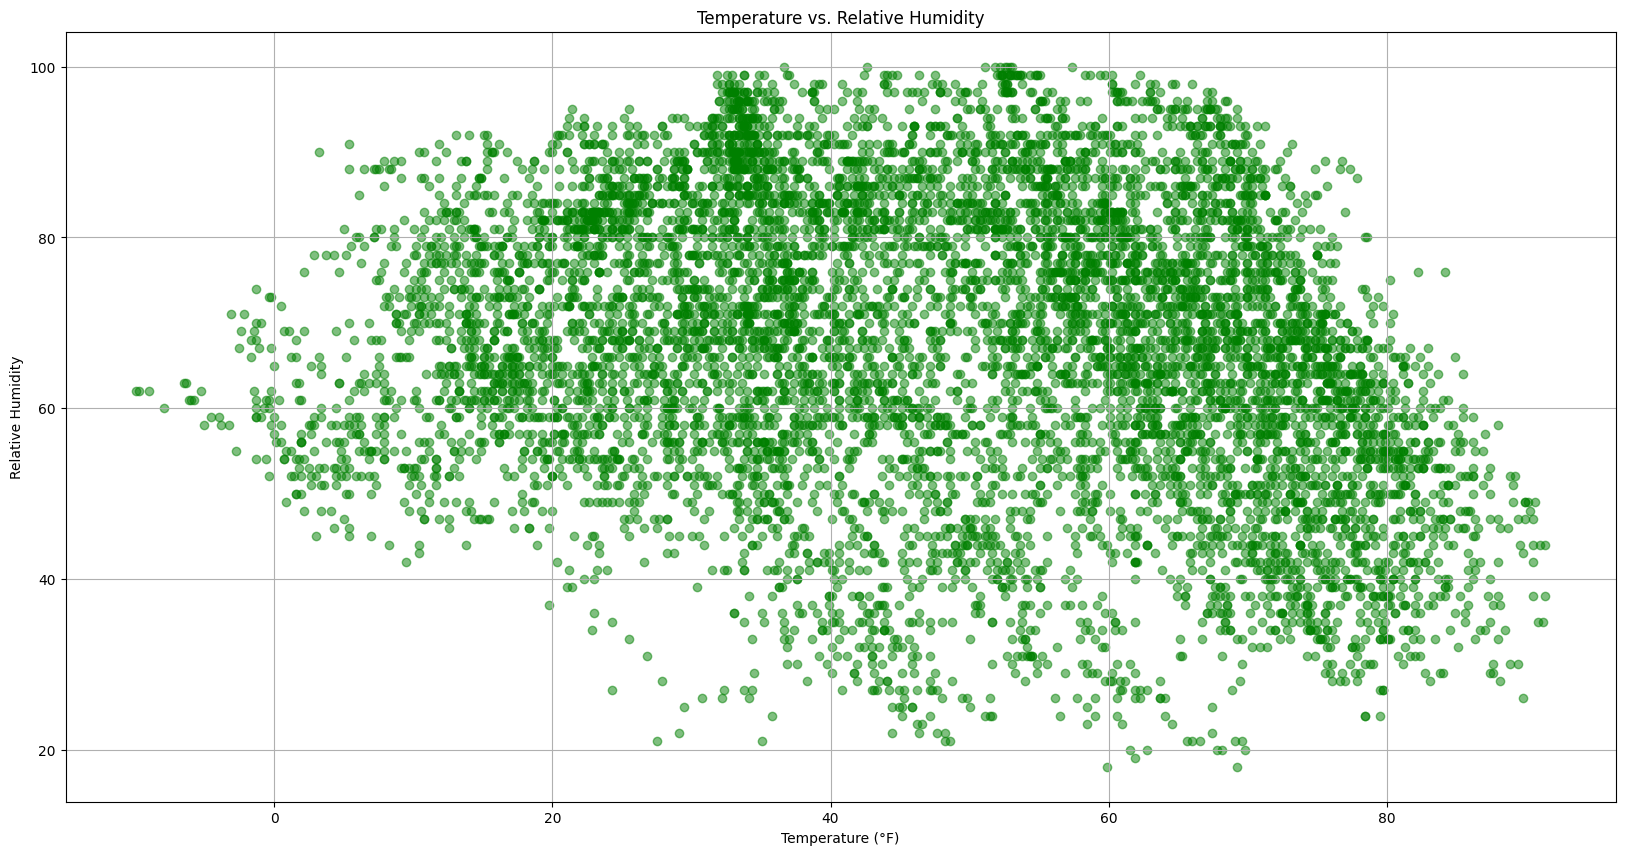

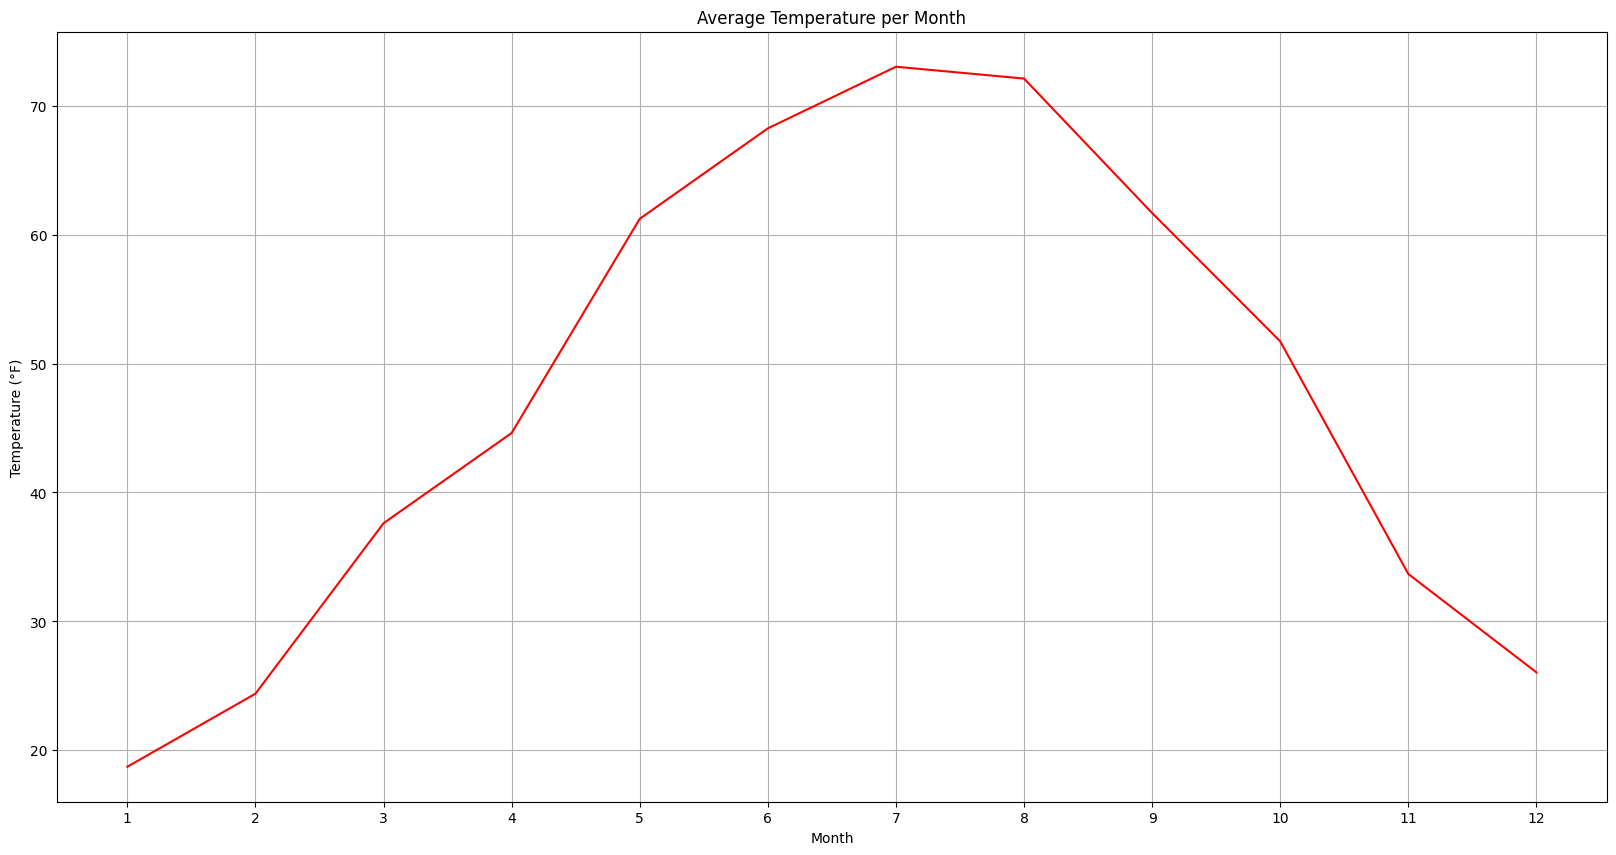

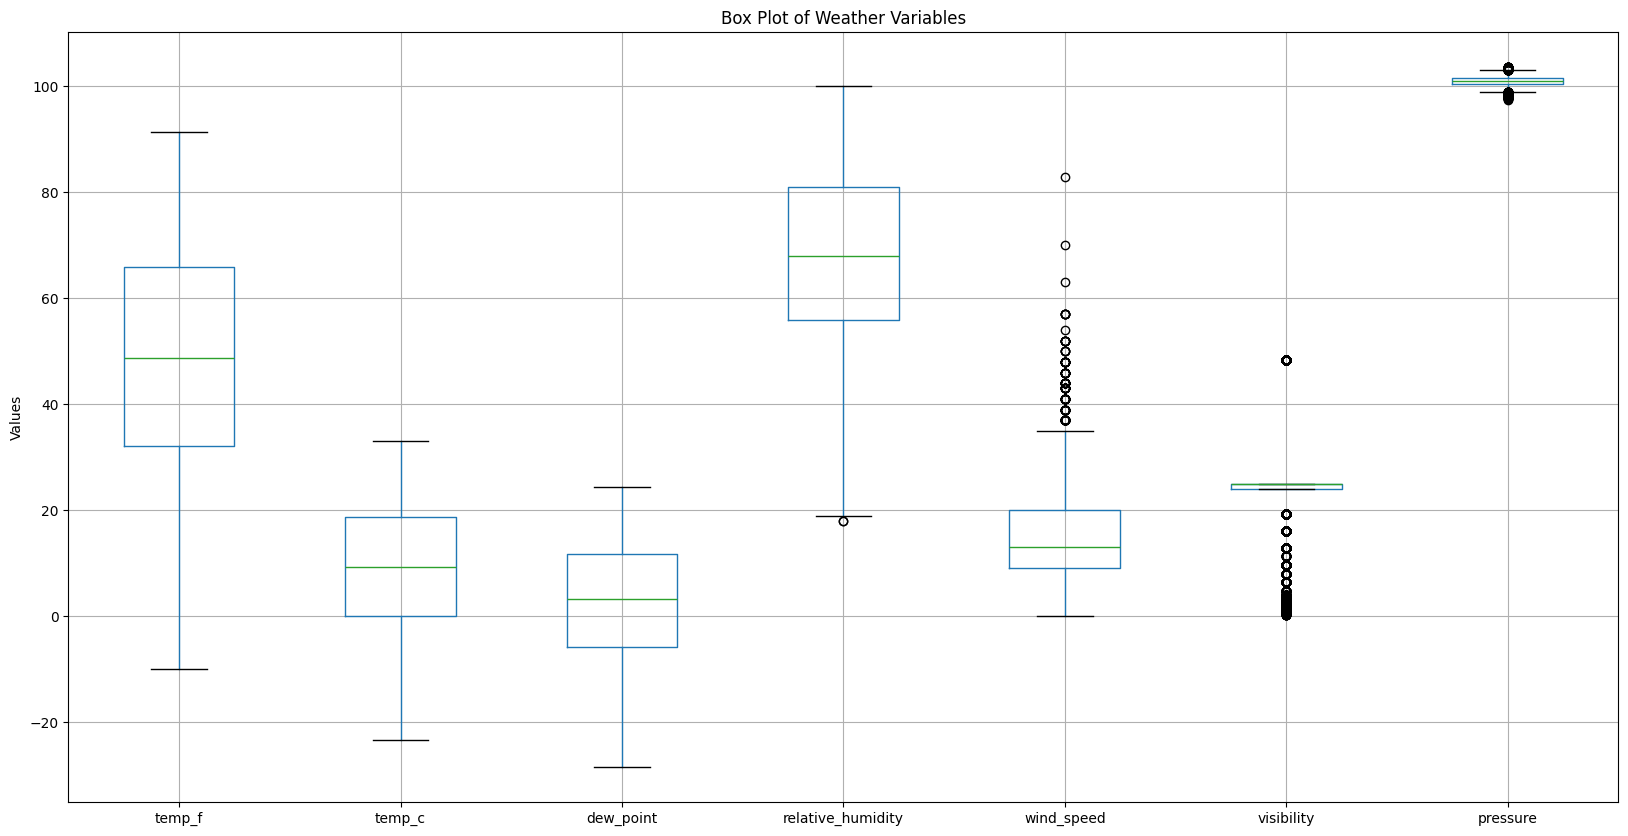

In [8]:
# Machine Learning Assignment 1
# Felix Ramos
# CS430-ON
# Machine Learning in the Cloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Step 1: Upload CSV to Gooogle Drive to be able to read file
drive.mount('/content/drive')

# Step 2: Read the data from CSV file
df = pd.read_csv('/content/drive/MyDrive/weather_2012.csv')

# Step 3: Display first five rows
print("First five rows of the dataset:")
print(df.head())

# Display last five rows
print("\nLast five rows of the dataset:")
print(df.tail())

# Display the random five rows
print("\nRandom five rows of the dataset:")
print(df.sample(5))

# Step 4: Display list of all the columns from the file
print("\nList of all columns in the dataset:")
print(df.columns.tolist())

# Step 5: Rename columns to the specified names from list in instructions
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']
print("\nColumns after renaming:")
print(df.columns.tolist())

# Step 6: Display standard statistics
print("\nStandard statistics for each numerical column:")
print(df.describe())

# Step 7: Add temp_f Column
# Formula: °F = (°C * 9/5) + 32
df['temp_f'] = (df['temp_c'] * 9/5) + 32

# Step 8: Rearrange columns to place temp_f Before temp_c
cols = df.columns.tolist()

# Remove temp_f and put it before temp_c
cols.remove('temp_f')
temp_c_index = cols.index('temp_c')
cols.insert(temp_c_index, 'temp_f')

# Reorder the data
df = df[cols]
print("\nColumns after rearranging:")
print(df.columns.tolist())

# Step 9: Display the data types of the columns
print("\nData types of all columns:")
print(df.dtypes)

# Step 10: Convert date_time to DateTime, then verify it works
df['date_time'] = pd.to_datetime(df['date_time'])
print("\nData types after converting date_time:")
print(df.dtypes)

# Step 11: Get avg temp(in °F) for each month
df['month'] = df['date_time'].dt.month

# Calculate the avg temp_f for each month
monthly_avg = df.groupby('month')['temp_f'].mean()
print("\nAverage temperature per month (in °F):")
print(monthly_avg)

# Step 12: Create the scatterplot (Temperature vs. Relative Humidity)
plt.figure(figsize=(20, 10))
plt.scatter(df['temp_f'], df['relative_humidity'], color='green', alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Relative Humidity')
plt.grid(True)
plt.show()

# Step 13: Create the line chart (Average Temperature per Month)
plt.figure(figsize=(20, 10))
plt.plot(monthly_avg.index, monthly_avg.values, color='red')
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

# Step 14: Generate Box Plot
numerical_cols = ['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure']

plt.figure(figsize=(20, 10))
df[numerical_cols].boxplot()
plt.title('Box Plot of Weather Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()




